This is where I explain what I plan to do


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [10]:
df.isna().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [15]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 


- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking



In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [9]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ["sales_channel", "trip_type", "route", "booking_origin"]
label_encoder = {}

for col in categorical_columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoder[col] = le

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0


Data seems ready for testing

In [27]:
#time for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [20]:
#define feature and impact
x = df.drop('booking_complete', axis=1)
y = df['booking_complete']

In [23]:
#spilt data
X_train, X_test, y_train, y_test, = train_test_split(x, y , test_size=0.2, random_state= 42, stratify=y)


In [24]:
#train RandomForrest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
#predicition
y_pred = model.predict(X_test)

In [28]:
#evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8534
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8504
           1       0.56      0.10      0.17      1496

    accuracy                           0.85     10000
   macro avg       0.71      0.54      0.54     10000
weighted avg       0.82      0.85      0.81     10000



observed that the f1-score for class1 is too low and the recall also
I want to try to see the feature's importance

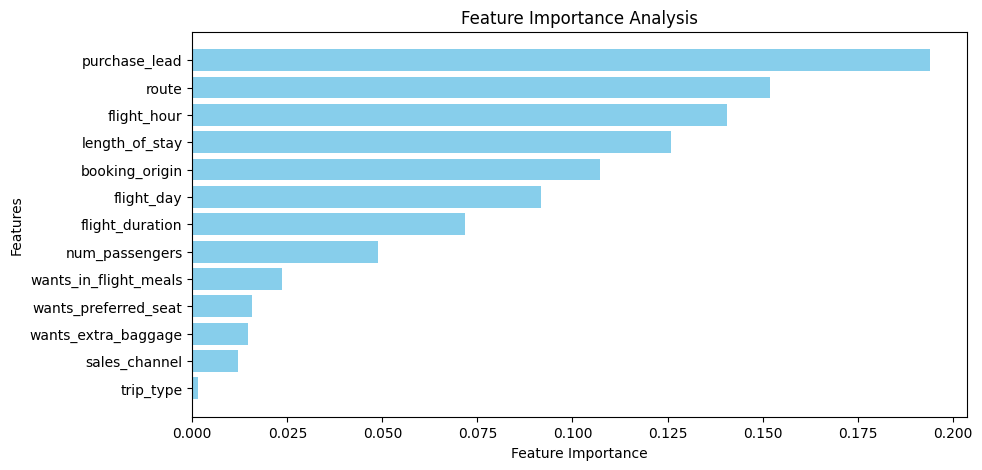

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = model.feature_importances_

# Create a sorted list of feature importances
sorted_idx = np.argsort(feature_importances)[::-1]
features = x.columns[sorted_idx]
importances = feature_importances[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Analysis")
plt.gca().invert_yaxis()
plt.show()


As we can see, we have some features that are less important, and I am considering dropping them or adding them together, but I want to try SMOTE firs.

In [32]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Train a new RandomForest model on balanced data
model_bal = RandomForestClassifier(n_estimators=100, random_state=42)
model_bal.fit(X_train_bal, y_train_bal)

# Predictions
y_pred_bal = model_bal.predict(X_test)

# Evaluate new model
accuracy_bal = accuracy_score(y_test, y_pred_bal)
report_bal = classification_report(y_test, y_pred_bal)

print(f"New Accuracy after SMOTE: {accuracy_bal:.4f}")
print("New Classification Report:\n", report_bal)


New Accuracy after SMOTE: 0.7983
New Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      8504
           1       0.34      0.36      0.35      1496

    accuracy                           0.80     10000
   macro avg       0.61      0.62      0.62     10000
weighted avg       0.80      0.80      0.80     10000



The Model seems a little bit better with SMOTE, the f1-score for class 1 has improved a bit but still feels like there is room for improvement

After considering again, I have decided to drop some less important features and apply SMOTE again

In [33]:
# Drop low-importance features
low_importance_features = ["trip_type", "sales_channel", "wants_extra_baggage",
                           "wants_preferred_seat", "wants_in_flight_meals"]
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

# Apply SMOTE again on the reduced feature set
X_train_bal_reduced, y_train_bal_reduced = smote.fit_resample(X_train_reduced, y_train)

# Train a new RandomForest model
model_bal_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
model_bal_reduced.fit(X_train_bal_reduced, y_train_bal_reduced)

# Predictions
y_pred_bal_reduced = model_bal_reduced.predict(X_test_reduced)

# Evaluate model
accuracy_bal_reduced = accuracy_score(y_test, y_pred_bal_reduced)
report_bal_reduced = classification_report(y_test, y_pred_bal_reduced)

print(f"New Accuracy after Feature Selection: {accuracy_bal_reduced:.4f}")
print("New Classification Report:\n", report_bal_reduced)


New Accuracy after Feature Selection: 0.8054
New Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      8504
           1       0.35      0.37      0.36      1496

    accuracy                           0.81     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.81      0.81      0.81     10000



Removing less important features improved class 1 recall and f1-score a little but didn't improve much. Now considering other improvement methods

---



In [34]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],  # More trees can improve performance
    "max_depth": [10, 20, None],  # Limit depth for better generalization
    "min_samples_split": [2, 5, 10],  # Control overfitting
    "class_weight": [None, "balanced"]  # Adjust for class imbalance
}

# Initialize RandomForest
rf_tuned = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_tuned, param_grid, cv=5, scoring="recall", n_jobs=-1, verbose=2)
grid_search.fit(X_train_bal_reduced, y_train_bal_reduced)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_reduced)

# Evaluate
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print(f"New Accuracy after Hyperparameter Tuning: {accuracy_best:.4f}")
print("New Classification Report:\n", report_best)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
New Accuracy after Hyperparameter Tuning: 0.7819
New Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87      8504
           1       0.33      0.44      0.37      1496

    accuracy                           0.78     10000
   macro avg       0.61      0.64      0.62     10000
weighted avg       0.81      0.78      0.79     10000



class 1 recall has improved a whole lot, the accuracy reduced slightly. I will finalize the model here for now. But I will generate the feature importance first

In [35]:
#save the model
import joblib
joblib.dump(best_model, 'model.pkl')
print('Model saved sucessfully')

Model saved sucessfully


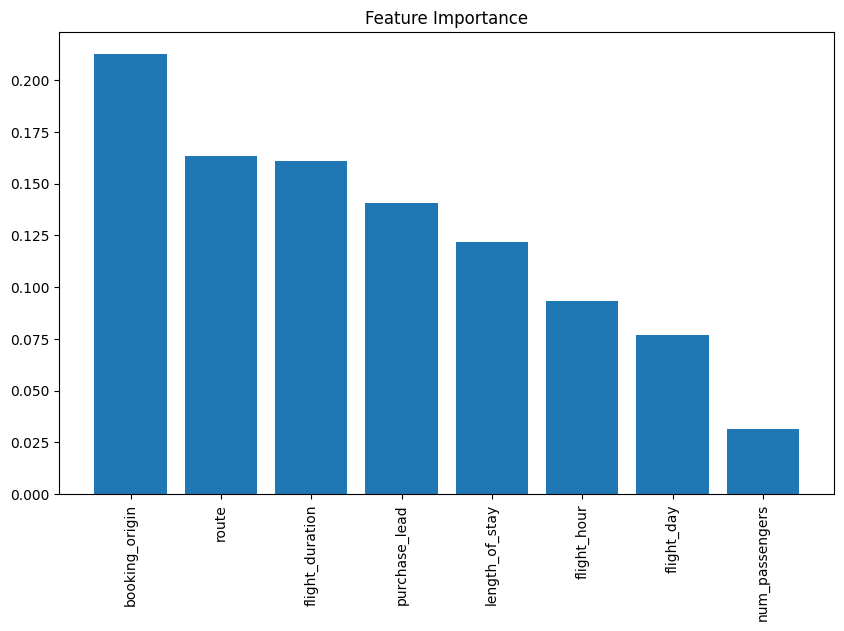

In [36]:
# Get feature importance
importances = best_model.feature_importances_
feature_names = X_train_reduced.columns

# Sort and plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(feature_names)), importances[indices], align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
plt.show()